<a href="https://colab.research.google.com/github/mairakhan5/mairakhan5/blob/main/Lecture_1_Homework_(solutions).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Data download
#@markdown This cell contains code to retrieve the dataset for our tutorial. You can ignore its contents, for the most part
! pip install gdown > /dev/null
import gdown

def download_gdrive(id_, name):
  url = f'https://drive.google.com/uc?id={id_}'
  gdown.download(url, name, quiet=False)

download_gdrive('1ie_EfdmFZ3S219IYN14z8gsc6eAQG4eq', 'boston_dataset.csv')
download_gdrive('1Mfsyhey7SAhtsPHNHwK6oDGEjIHcudjc', 'boston_dataset_clean.csv')

Downloading...
From: https://drive.google.com/uc?id=1ie_EfdmFZ3S219IYN14z8gsc6eAQG4eq
To: /content/boston_dataset.csv
100%|██████████| 38.7k/38.7k [00:00<00:00, 22.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Mfsyhey7SAhtsPHNHwK6oDGEjIHcudjc
To: /content/boston_dataset_clean.csv
100%|██████████| 35.7k/35.7k [00:00<00:00, 15.8MB/s]


In [ ]:
import pandas as pd
import seaborn as sns

# Homework for session 1

## The Boston housing dataset

In this exercise we will be using the Boston housing datasets, one of the most common reference datasets in introductory data science. The Boston housing dataset contains information about property costs in the Boston area in the 1970s, including data on their location, value, and various features. The dataset includes 506 samples and 14 features, and the task is often used to predict the median value of owner-occupied homes in the area based on variables (_features_, in machine learning parlance) such as the `crim` rate (per capita crime rate by town), the `age` of the property, and the `rm` number of rooms.

The features included in the dataset are:

   - `crim`: per capita crime rate by town
   - `zn`: proportion of residential land zoned for lots over 25,000 sq.ft.
   - `indus`: proportion of non-retail business acres per town
   - `chas`: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
   - `nox`: nitrogen oxides concentration (parts per 10 million)
   - `rm`: average number of rooms per dwelling
   - `age`: proportion of owner-occupied units built prior to 1940
   - `dis`: weighted distances to five Boston employment centres
   - `rad`: index of accessibility to radial highways
   - `tax`: full-value property-tax rate per $10,000
   - `ptratio`: pupil-teacher ratio by town
   - `b`: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
   - `lstat`: lower status of the population (percent)


Finally, the median value of owner-occupied homes in \$1,000s (e.g. 30 means $30,000) is quoted as `medv`. 

If you have looked at the features above, you may have (reasonably so) raised your eyebrows at features like `black`. This merits a crucial comment on the development of machine learning models. While this feature may be relevant for understanding housing prices in the Boston area in the 1970s, it is important to consider the potential ethical implications of using it in predictive affairs. Using a feature that represents the racial makeup of a community can (and will) perpetuate existing biases or discriminate against certain groups. Choosing fair and unbiased features is especially important when machine learning systems are embedded in decision-making processes, as they can have real-world consequences for individuals and communities. Thus, exploratory data analysis is not only a crucial step for success -- it is only necessary to make machine learning models that are fair and for the good of everyone involved.

### Arranging a dataset

We have downloaded a version of the Boston housing dataset with the cell code at the top of the notebook. Please read the contents of this `boston_dataset.csv` file, and have a look at the structure of the DataFrame.

In [ ]:
df = pd.read_csv('boston_dataset.csv')
df

,age,b,chas,crim,dis,indus,lstat,medv,nox,ptratio,rad,rm,tax,zn
0,65.2,396.90,0.0,0.00632,4.0900,2.31,4.98,24.0,0.538,15.3,1.0,6.575,NaN,18.0
1,78.9,396.90,0.0,NaN,4.9671,7.07,9.14,21.6,0.469,17.8,2.0,6.421,242.0,0.0
2,61.1,392.83,0.0,0.02729,4.9671,7.07,4.03,34.7,NaN,17.8,2.0,7.185,242.0,0.0
3,NaN,394.63,0.0,0.03237,6.0622,2.18,2.94,33.4,0.458,18.7,3.0,6.998,222.0,0.0
4,54.2,NaN,0.0,0.06905,6.0622,2.18,5.33,36.2,0.458,18.7,3.0,7.147,222.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,69.1,391.99,NaN,0.06263,2.4786,11.93,9.67,22.4,0.573,21.0,1.0,6.593,273.0,0.0
502,76.7,396.90,0.0,0.04527,2.2875,11.93,9.08,20.6,0.573,21.0,1.0,NaN,273.0,0.0
503,91.0,396.90,0.0,0.06076,2.1675,NaN,5.64,23.9,0.573,21.0,1.0,6.976,273.0,0.0
504,89.3,393.45,0.0,0.10959,2.3889,11.93,6.48,22.0,0.573,21.0,1.0,6.794,273.0,0.0


### Exploratory data analysis

Let's do some basic exploratory data analysis. Have a look at the mean values, standard deviations and ranges of the features:

In [ ]:
df.describe(include='all')

,age,b,chas,crim,dis,indus,lstat,medv,nox,ptratio,rad,rm,tax,zn
count,455.000000,460.000000,455.000000,458.000000,452.000000,461.000000,448.000000,506.000000,456.000000,458.000000,444.000000,456.000000,456.000000,461.000000
mean,68.817802,358.629565,0.068132,3.470654,3.765203,11.144599,12.586406,22.532806,0.554934,18.473144,9.659910,6.299974,410.467105,11.601952
std,28.161930,88.581360,0.252249,7.799637,2.079281,6.851295,6.979512,9.197104,0.116444,2.151779,8.800478,0.699084,169.004880,23.756084
min,2.900000,0.320000,0.000000,0.006320,1.129600,0.460000,1.730000,5.000000,0.385000,12.600000,1.000000,3.561000,188.000000,0.000000
25%,45.050000,376.092500,0.000000,0.081900,2.084875,5.190000,6.907500,17.025000,0.448750,17.400000,4.000000,5.890500,281.000000,0.000000
50%,77.800000,391.385000,0.000000,0.266005,3.122200,9.690000,11.330000,21.200000,0.538000,19.100000,5.000000,6.224500,330.000000,0.000000
75%,94.100000,396.215000,0.000000,3.689388,5.141475,18.100000,16.992500,25.000000,0.624000,20.200000,24.000000,6.629250,666.000000,12.500000
max,100.000000,396.900000,1.000000,73.534100,12.126500,27.740000,36.980000,50.000000,0.871000,22.000000,24.000000,8.780000,711.000000,100.000000


Visualise the distributions of these variables using a histogram:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f11f707a1f0>,
      dtype=object)

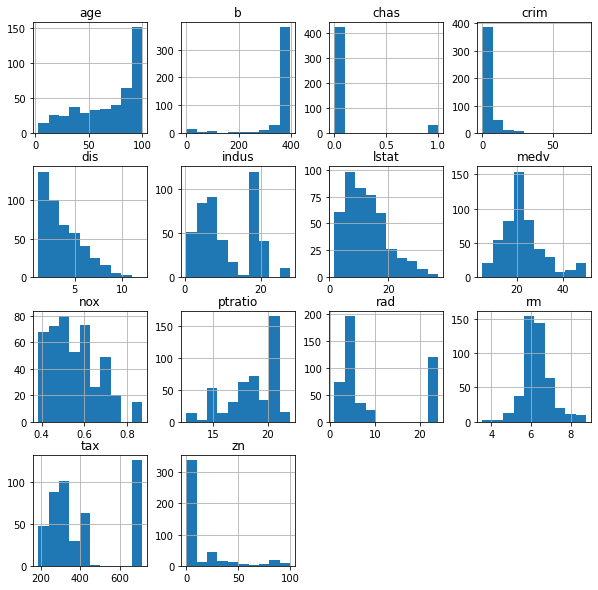

In [ ]:
df.hist(figsize=(10, 10))

Can you make a plot to study the correlation between different features and the target variable `medv`?

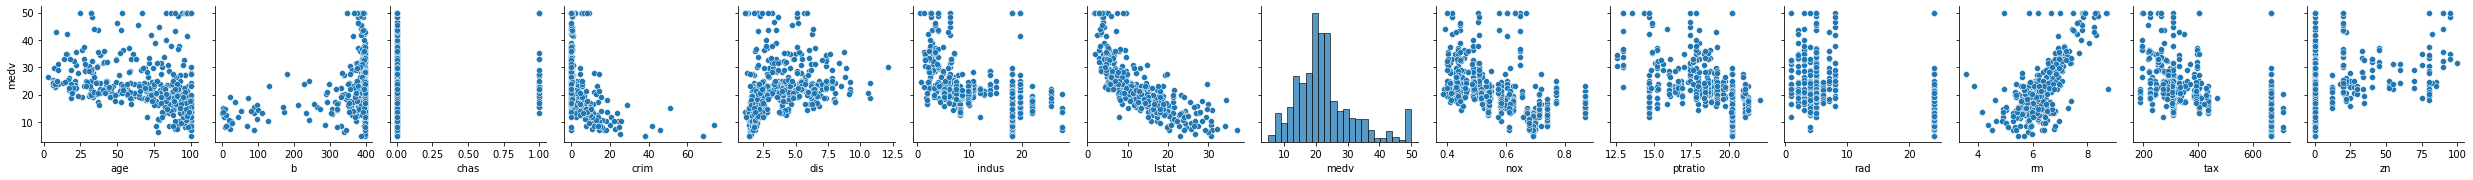

In [ ]:
sns.pairplot(df, y_vars='medv')

Ask yourself a few basic questions about the data:

- Some features are concentrated in a narrow range. For example, there are many houses with 5-8 rooms, but very few with less than 4 or more than 9 rooms. What is the impact of data availability in our ability to make predictions or extract conclusions? Which other variables exhibit this behaviour?
- Some features exhibit clear correlation with the target. For example, higher criminality areas show much lower prices. Can you identify several variables that show this behaviour? Which variables don't seem to have any correlation with the price? Does this mean they are not useful for predictive models, or to draw conclusions?

### Filling missing values

Most real datasets have missing values, and this is not an exception. Count the number of missing entries for each feature.

In [ ]:
df.isnull().sum()

age        51
b          46
chas       51
crim       48
dis        54
indus      45
lstat      58
medv        0
nox        50
ptratio    48
rad        62
rm         50
tax        50
zn         45
dtype: int64

Implement an imputation strategy that:

- for categorical variables, assumes the most common example
- for continuous variables, uses the median value (why the median and not the mean?)

In [ ]:
# First, let's define the variables
categorical = ['chas', 'rad']
numerical = ['age', 'b', 'crim', 'dis', 'indus', 'lstat', 'nox', 'ptratio', 'rm', 'tax', 'zn']
variables = categorical + numerical

for var in variables:

  # Find out where the missing values are
  missing = df[var].isnull()
  n_missing = missing.sum()
  if missing.sum() == 0:
    print(f'No missing values for feature `{var}`')
    continue

  # Calculate the imputated value
  if var in categorical:
    imputated_value = df[~missing][var].mode()[0]
  elif var in numerical:
    imputated_value = df[~missing][var].median()
  else:
    raise ValueError('Wrong variable!')

  # Substitute in the dataset
  missing_ind = missing[missing == True].index
  df.loc[missing_ind, var] = imputated_value
  print(f'Imputated {n_missing} missing values for feature `{var}`')

Imputated 51 missing values for feature `chas`
Imputated 62 missing values for feature `rad`
Imputated 51 missing values for feature `age`
Imputated 46 missing values for feature `b`
Imputated 48 missing values for feature `crim`
Imputated 54 missing values for feature `dis`
Imputated 45 missing values for feature `indus`
Imputated 58 missing values for feature `lstat`
Imputated 50 missing values for feature `nox`
Imputated 48 missing values for feature `ptratio`
Imputated 50 missing values for feature `rm`
Imputated 50 missing values for feature `tax`
Imputated 45 missing values for feature `zn`
